In [2]:
import sys
sys.path.append('../')
from PINN_Survey.problems.laplace_smooth.data.load import load_laplace_bounds
from PINN_Survey.problems.laplace_smooth.v1 import Laplace, Laplace_Soft_Mesh,Laplace_Domain_Transformer
import numpy as np
import matplotlib.pyplot as plt

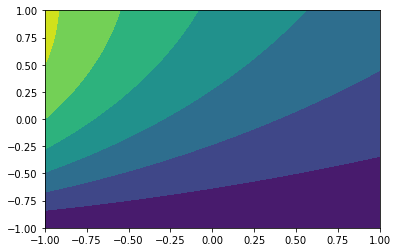

In [3]:
X_true, U_true, X_bounds, U_bounds, _ = load_laplace_bounds()
plt.tricontourf(X_true[:,0], X_true[:,1], U_true[:,0])

In [4]:
X = np.vstack(X_bounds)
U = np.vstack(U_bounds)

idx = np.random.choice( list(range(X_true.shape[0])), size=5000 )
X_df = X_true[idx,:]

lower_bound = np.min(X_true,axis=0)
upper_bound = np.max(X_true,axis=0)

In [5]:
model = Laplace(lower_bound, upper_bound, [2,20,20,20,20,20,20,20,1])
model.train_BFGS(X,U,X_df,True)

U_hat = model.predict(X_true)

print("RMSE", np.sqrt(np.mean((U_true[:,0] - U_hat[:,0])**2)) )
print("Relative Error", np.linalg.norm(U_true-U_hat,2)/np.linalg.norm(U_true,2))






INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 0.000002
  Number of iterations: 1208
  Number of functions evaluations: 1487
RMSE 0.0005976787394449677
Relative Error 0.0025814550020229333


In [6]:
model = Laplace_Soft_Mesh(lower_bound, upper_bound, [2,20,20,20,20,20,20,1], [2,20,20])
model.train_BFGS(X,U,X_df,True)
U_hat = model.predict(X_true)

print("RMSE", np.sqrt(np.mean((U_true[:,0] - U_hat[:,0])**2)) )
print("Relative Error", np.linalg.norm(U_true-U_hat,2)/np.linalg.norm(U_true,2))

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 0.000000
  Number of iterations: 1730
  Number of functions evaluations: 1875
RMSE 1.113609846517768e-05
Relative Error 4.809830965821028e-05


In [8]:
model = Laplace_Domain_Transformer(lower_bound, upper_bound,2,1,20,8)
model.train_BFGS(X,U,X_df,True)
U_hat = model.predict(X_true)

print("RMSE", np.sqrt(np.mean((U_true[:,0] - U_hat[:,0])**2)) )
print("Relative Error", np.linalg.norm(U_true-U_hat,2)/np.linalg.norm(U_true,2))

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 0.000000
  Number of iterations: 1750
  Number of functions evaluations: 1844
RMSE 1.2943301930068683e-05
Relative Error 5.590386491093416e-05
